<h3>1.Increased No of Epochs
  <br> 2. Inreased Batch size  and Learning rate</h3>

<h3>Import Libraries and modules</h3>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add , BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


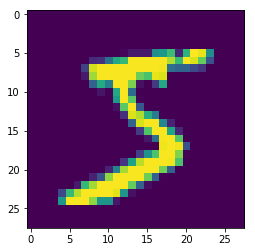

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:

from keras.layers import Activation
model1 = Sequential()


                                                                                  #input - conv - receptive feild
                                                                                  #input_conv|Receptive Field|output  

model1.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 |3x3|26x26
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16, 3, 3, activation='relu'))                            #26x26 |5x5|24x24
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16, 3, 3, activation='relu'))                            #24x24 |7x7|22x22
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(MaxPooling2D(pool_size=(2,2)))                                         #      |14x14|11x11    
model1.add(Convolution2D(10, 1, 1, activation='relu'))                                #11x11 |14x14|11x11 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16,3,3, activation='relu'))                              #11x11 |16x16|9x9 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16,3,3, activation='relu'))                              #9x9   |18x18|7x7 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
#model1.add(Convolution2D(256,3,3,activation='relu'))                             
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                             
model1.add(Convolution2D(10, 1, activation='relu'))
model1.add(Convolution2D(10,7))                                                   #using kernel size 7 directly.  

model1.add(Flatten())
model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 16)        2320      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.004), metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 155us/step - loss: 0.1975 - acc: 0.9366 - val_loss: 0.0560 - val_acc: 0.9822
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0587 - acc: 0.9823 - val_loss: 0.0368 - val_acc: 0.9883
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0453 - acc: 0.9856 - val_loss: 0.0351 - val_acc: 0.9895
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0392 - acc: 0.9870 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

<h3>Conclusion</h3>

Achieved 99.41 Accuracy at 23rd epoch.

Drawback-:
Accuracy not consistent.

-------------------------------





In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.020518906447895644, 0.9931]


In [0]:
y_pred = model1.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.01038088e-13 1.67411657e-11 3.29837890e-09 1.58732352e-08
  2.26387546e-14 1.03558763e-12 5.95082377e-18 1.00000000e+00
  1.89548355e-13 7.92189780e-09]
 [7.25308036e-09 9.73269607e-07 9.99998927e-01 1.04415171e-10
  2.67111444e-10 1.77275589e-15 1.78039087e-07 5.85105011e-12
  8.69813643e-09 5.25459971e-12]
 [1.16043786e-10 9.99994993e-01 1.84171242e-07 2.29421193e-08
  1.88482022e-06 3.21451772e-08 2.19192682e-08 2.58668229e-06
  2.91813933e-08 1.91871578e-07]
 [9.99907970e-01 1.09631305e-15 5.43699805e-08 7.75671020e-12
  1.55854334e-08 1.59818159e-10 9.13815384e-05 1.21382182e-09
  6.53961862e-09 6.07154675e-07]
 [1.42035116e-11 1.99976091e-10 4.77963447e-09 1.84337485e-12
  9.99999523e-01 1.21737891e-16 7.13131550e-12 7.25984939e-10
  1.02805445e-10 4.80490883e-07]
 [1.52745139e-09 9.99975443e-01 4.68032886e-06 8.42725445e-09
  9.26446603e-07 2.23717378e-09 1.33338602e-08 1.85893587e-05
  2.36996101e-07 1.67462503e-07]
 [9.40539980e-21 4.96122006e-08 1.58567562e-10 1.00430394e

Modified network - Changing a bit layers position and Kernels on the same 

In [0]:
from keras.layers import Activation
model2 = Sequential()


                                                                                 
                                                                                    

model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26    
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16, 3, 3, activation='relu'))                       #24  
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(10, 1, 1, activation='relu'))                       #24
model2.add(MaxPooling2D(pool_size=(2,2)))                                    #12                   
                                                                                  
model2.add(Convolution2D(16, 3, 3, activation='relu'))                       #10             
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16,3,3, activation='relu'))                          #8             
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16,3,3, activation='relu'))                          #6            
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16,3,3, activation='relu'))                          #4            
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
#model1.add(Convolution2D(256,3,3,activation='relu'))                               
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              
#model1.add(Convolution2D(10, 1, activation='relu'))
model2.add(Convolution2D(10,4,4))                                                    

model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 139us/step - loss: 0.2283 - acc: 0.9284 - val_loss: 0.0563 - val_acc: 0.9817
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 108us/step - loss: 0.0665 - acc: 0.9789 - val_loss: 0.0374 - val_acc: 0.9884
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 109us/step - loss: 0.0496 - acc: 0.9846 - val_loss: 0.0453 - val_acc: 0.9847
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 108us/step - loss: 0.0419 - acc: 0.9865 - val_loss: 0.0418 - val_acc: 0.9872
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01714236657834699, 0.9951]


In [0]:
y_pred = model2.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.41195244e-09 2.31384135e-07 7.33760053e-10 5.00214377e-08
  4.35332161e-08 9.55860478e-12 3.95706835e-11 9.99999762e-01
  2.43622900e-11 5.88021045e-08]
 [6.44231193e-08 5.49325705e-07 9.99999404e-01 1.31708155e-08
  1.59649738e-09 5.24082991e-12 9.46693479e-09 4.68432084e-08
  5.75559653e-08 5.66246883e-10]
 [1.54089648e-08 9.99999166e-01 9.46940659e-09 7.25996763e-11
  1.40328382e-07 1.46130796e-09 5.63131721e-07 3.48623885e-09
  8.75732340e-08 1.19258692e-09]
 [9.99983907e-01 1.00631377e-14 2.06431601e-08 6.28882368e-09
  1.59238098e-07 1.65845577e-08 5.61240495e-06 2.06344222e-08
  5.98711836e-07 9.65027812e-06]
 [8.57285000e-13 6.47022613e-09 2.07372192e-11 4.72836917e-12
  9.99993801e-01 2.66578968e-12 3.05220405e-10 1.59419561e-11
  4.68977968e-10 6.14779083e-06]
 [5.45042100e-09 9.99999642e-01 2.81901560e-08 7.67385884e-13
  2.52538229e-07 6.82345239e-12 1.92854959e-08 5.12808640e-08
  2.59830557e-09 1.20703962e-08]
 [1.72202291e-12 3.28721617e-05 1.92703804e-11 3.60917407e

<h3>Conclusion and observations</h3>

Steps Followed -:

1.Parameters achieved - 13,072.

2.Accuracy need to be matched 99.4 , getting Validation acc - 99.51 at 22nd epoch and 99.4 at 10th epoch , Training acc - 99.63(need to be worked out more)


Concluding Points (Points to be taken care to achieve a expected working model) - :
1. Kernels and layers to be tuned properly.
2.Batch normalization should not be added after prediction layer.
3.Dropout value should not be very high.
4.Accuracy should be consistent(may vary a bit not much)  throughout epochs after certain threshold.

---------------------------------

<h3>Image Normalization.</h3>

In [19]:
from keras.preprocessing.image import ImageDataGenerator
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_train, Y_train, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())


Statistics train=0.131 (0.308), test=0.133 (0.310)
Data Generator mean=0.131, std=0.308
(64, 28, 28, 1) 0.01073329 1.0083636
(60000, 28, 28, 1) -4.9324944e-07 0.9999959


In [20]:
from keras.layers import Activation
model3 = Sequential()


                                                                                 
                                                                                    

model3.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26    
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Convolution2D(16, 3, 3, activation='relu'))                       #24  
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Convolution2D(10, 1, 1, activation='relu'))                       #24
model3.add(MaxPooling2D(pool_size=(2,2)))                                    #12                   
                                                                                  
model3.add(Convolution2D(16, 3, 3, activation='relu'))                       #10             
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Convolution2D(16,3,3, activation='relu'))                          #8             
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Convolution2D(16,3,3, activation='relu'))                          #6            
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Convolution2D(16,3,3, activation='relu'))                          #4            
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
#model1.add(Convolution2D(256,3,3,activation='relu'))                               
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              
#model1.add(Convolution2D(10, 1, activation='relu'))
model3.add(Convolution2D(10,4,4))                                                    

model3.add(Flatten())
model3.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

In [21]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [22]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model3.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 142us/step - loss: 0.2270 - acc: 0.9281 - val_loss: 0.0862 - val_acc: 0.9724
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 109us/step - loss: 0.0679 - acc: 0.9790 - val_loss: 0.0548 - val_acc: 0.9826
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 109us/step - loss: 0.0541 - acc: 0.9827 - val_loss: 0.0567 - val_acc: 0.9829
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 109us/step - loss: 0.0429 - acc: 0.9859 - val_loss: 0.0383 - val_acc: 0.9884
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

<h3>Regularization - Corrected in model 6</h3>

In [0]:
# import regularizer
from keras.regularizers import l2
# instantiate regularizer
reg = l2(0.001)

In [30]:
from keras.layers import Activation
model4 = Sequential()


                                                                                 
                                                                                    

model4.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26    
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))

model4.add(Convolution2D(16, 3, 3, activation='relu'))                       #24  
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))

model4.add(Convolution2D(10, 1, 1, activation='relu'))                       #24
model4.add(MaxPooling2D(pool_size=(2,2)))                                    #12                   
                                                                                  
model4.add(Convolution2D(16, 3, 3, activation='relu'))                       #10             
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
model4.add(Convolution2D(16,3,3, activation='relu'))                          #8             
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
model4.add(Convolution2D(16,3,3, activation='relu'))                          #6            
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
model4.add(Convolution2D(16,3,3, activation='relu'))                          #4            
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
#model1.add(Convolution2D(256,3,3,activation='relu'))                               
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              
#model1.add(Convolution2D(10, 1, activation='relu'))
model4.add(Convolution2D(10,4,4))                                                    

model4.add(Flatten())
model4.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1

In [31]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_20 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
dense_7 (Dense)              (None, 26, 26, 32)        352       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_21 (Dropout)         (None, 24, 24, 16)        0         
__________

In [32]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model4.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 13s 218us/step - loss: 114.7464 - acc: 0.1355 - val_loss: 4.6313 - val_acc: 0.0958
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 9s 153us/step - loss: 2.3099 - acc: 0.1119 - val_loss: 4.1501 - val_acc: 0.1135
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 9s 154us/step - loss: 2.3060 - acc: 0.1124 - val_loss: 2.3411 - val_acc: 0.1135
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 9s 154us/step - loss: 2.3053 - acc: 0.1123 - val_loss: 2.3311 - val_acc: 0.1135
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [===

In [0]:
score = model4.evaluate(X_test, Y_test, verbose=0)

In [34]:
print(score)

[2.3020065952301025, 0.1135]


<h3>Relu After Batch Normalization</h3>

In [35]:
from keras.layers import Activation
model5 = Sequential()


                                                                                 
                                                                                    

model5.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26    
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
#model5.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))

model5.add(Convolution2D(16, 3, 3, activation='relu'))                       #24  
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
#model5.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))

model5.add(Convolution2D(10, 1, 1, activation='relu'))                       #24
model5.add(MaxPooling2D(pool_size=(2,2)))                                    #12                   
                                                                                  
model5.add(Convolution2D(16, 3, 3, activation='relu'))                       #10             
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
#model5.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
model5.add(Convolution2D(16,3,3, activation='relu'))                          #8             
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
#model5.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
model5.add(Convolution2D(16,3,3, activation='relu'))                          #6            
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
#model5.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
model5.add(Convolution2D(16,3,3, activation='relu'))                          #4            
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
#model5.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))


#model1.add(Convolution2D(256,3,3,activation='relu'))                               
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              
#model1.add(Convolution2D(10, 1, activation='relu'))
model5.add(Convolution2D(10,4,4))                                                    

model5.add(Flatten())
model5.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), acti

In [41]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_26 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_27 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 16)        0         
__________

In [37]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model5.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 176us/step - loss: 0.3334 - acc: 0.9028 - val_loss: 0.0826 - val_acc: 0.9738
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0787 - acc: 0.9751 - val_loss: 0.0515 - val_acc: 0.9834
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 112us/step - loss: 0.0592 - acc: 0.9817 - val_loss: 0.0467 - val_acc: 0.9851
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 110us/step - loss: 0.0495 - acc: 0.9849 - val_loss: 0.0464 - val_acc: 0.9870
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
score = model5.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

<h3>Including All conditions in One Model
<br>1.image normalization
<br>2.L2 regularization
<br>3.ReLU after BN
<br>4.Run your new code for 40 epochs and save the model with highest validation accuracy
<br>5.Find out 25 misclassified images from the validation dataset and create an image gallery</h3>

In [65]:
from keras.layers import Activation
model6 = Sequential()


                                                                                 
                                                                                    

model6.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26    
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Convolution2D(10,1,1,activity_regularizer=l2(0.001)))
model6.add(Dropout(0.1))
#model6.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
#model6.add(Convolution2D(10, (3,3), activity_regularizer=l1(0.001)))

model6.add(Convolution2D(16, 3, 3, activation='relu'))                       #24  
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))
model6.add(Dropout(0.1))
#model6.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))


model6.add(Convolution2D(10, 1, 1, activation='relu'))                       #24
model6.add(MaxPooling2D(pool_size=(2,2)))                                    #12                   
                                                                                  
model6.add(Convolution2D(16, 3, 3, activation='relu'))                       #10             
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))
model6.add(Dropout(0.1))
#model6.add(Convolution2D(16, (3,3), activity_regularizer=l1(0.001)))
#model6.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
#model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))


model6.add(Convolution2D(16,3,3, activation='relu'))                          #8             
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))
model6.add(Dropout(0.1))
#model6.add(Convolution2D(16, (3,3), activity_regularizer=l1(0.001)))
#model6.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
#model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))

model6.add(Convolution2D(16,3,3, activation='relu'))                          #6            
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))
model6.add(Dropout(0.1))
#model6.add(Convolution2D(16, (3,3), activity_regularizer=l1(0.001)))
#model6.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
#model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))

model6.add(Convolution2D(16,3,3, activation='relu'))                          #4            
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))
model6.add(Dropout(0.1))
#model6.add(Convolution2D(16, (3,3), activity_regularizer=l1(0.001)))
#model6.add(Dense(32, activation='linear', activity_regularizer=l2(0.001)))
#model6.add(Convolution2D(10,1,1, activity_regularizer=l2(0.001)))

#model1.add(Convolution2D(256,3,3,activation='relu'))                               
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              
#model1.add(Convolution2D(10, 1, activation='relu'))
model6.add(Convolution2D(10,4,4))                                                    

model6.add(Flatten())
model6.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activity_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activity_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-p

In [66]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_115 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
activation_100 (Activation)  (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 26, 26, 10)        110       
_________________________________________________________________
dropout_114 (Dropout)        (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_116 (Bat (None, 24, 24, 16)        64        
__________

In [67]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model6.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model6.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 20s 340us/step - loss: 42.9139 - acc: 0.3544 - val_loss: 5.1043 - val_acc: 0.1170
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 9s 156us/step - loss: 1.8490 - acc: 0.7515 - val_loss: 2.3858 - val_acc: 0.6026
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 9s 156us/step - loss: 1.2731 - acc: 0.8346 - val_loss: 3.8293 - val_acc: 0.2568
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 9s 156us/step - loss: 1.0647 - acc: 0.8632 - val_loss: 4.9882 - val_acc: 0.1239
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [====

In [0]:
score = model6.evaluate(X_test, Y_test, verbose=0)

In [69]:
print(score)

[2.5328401466369628, 0.3464]


In [0]:
y_pred = model6.predict(X_test)

In [73]:
print(y_pred[:9])


[[2.89623463e-03 2.17291806e-03 1.93129946e-03 4.51987656e-03
  2.85272923e-04 3.68012377e-04 4.25157987e-06 9.79429603e-01
  7.41473224e-04 7.65111111e-03]
 [1.42435925e-02 9.16528642e-01 5.39250970e-02 5.69544034e-03
  3.40319006e-03 2.02549435e-03 1.31421816e-03 1.29898079e-03
  5.52296638e-04 1.01306161e-03]
 [5.30133257e-04 9.88159001e-01 1.24193961e-03 1.59623707e-03
  2.41398183e-03 5.61951834e-04 1.28066546e-04 4.43630386e-03
  1.78753180e-04 7.53560395e-04]
 [5.45816235e-02 5.18968642e-01 4.04330827e-02 2.23641172e-01
  2.17576381e-02 1.55062834e-02 1.06962654e-03 7.64204338e-02
  5.38451644e-03 4.22369987e-02]
 [2.39053788e-03 3.49935025e-01 1.67315960e-01 3.37475017e-02
  3.63892317e-01 3.19938138e-02 8.47801473e-03 1.01547968e-03
  4.32824483e-03 3.69031578e-02]
 [5.30133257e-04 9.88159001e-01 1.24193961e-03 1.59623707e-03
  2.41398183e-03 5.61951834e-04 1.28066546e-04 4.43630386e-03
  1.78753180e-04 7.53560395e-04]
 [2.06714869e-03 9.09383036e-03 1.38048651e-02 5.85092232e

In [72]:
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]


In [75]:
print(y_pred[:25])

[[2.89623463e-03 2.17291806e-03 1.93129946e-03 4.51987656e-03
  2.85272923e-04 3.68012377e-04 4.25157987e-06 9.79429603e-01
  7.41473224e-04 7.65111111e-03]
 [1.42435925e-02 9.16528642e-01 5.39250970e-02 5.69544034e-03
  3.40319006e-03 2.02549435e-03 1.31421816e-03 1.29898079e-03
  5.52296638e-04 1.01306161e-03]
 [5.30133257e-04 9.88159001e-01 1.24193961e-03 1.59623707e-03
  2.41398183e-03 5.61951834e-04 1.28066546e-04 4.43630386e-03
  1.78753180e-04 7.53560395e-04]
 [5.45816235e-02 5.18968642e-01 4.04330827e-02 2.23641172e-01
  2.17576381e-02 1.55062834e-02 1.06962654e-03 7.64204338e-02
  5.38451644e-03 4.22369987e-02]
 [2.39053788e-03 3.49935025e-01 1.67315960e-01 3.37475017e-02
  3.63892317e-01 3.19938138e-02 8.47801473e-03 1.01547968e-03
  4.32824483e-03 3.69031578e-02]
 [5.30133257e-04 9.88159001e-01 1.24193961e-03 1.59623707e-03
  2.41398183e-03 5.61951834e-04 1.28066546e-04 4.43630386e-03
  1.78753180e-04 7.53560395e-04]
 [2.06714869e-03 9.09383036e-03 1.38048651e-02 5.85092232e

In [76]:
print(y_test[:25])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
